##### In this demo notebook, we'll review the science flight of the ER-2 starting on 12/03/2015. This was a ~3.5-h flight that supported a GPM overpass and sampled orographic precipitation. First, you need to install PyAMPR  (https://github.com/nasa/PyAMPR). Then, let's import all the needed modules.

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pyampr
%matplotlib inline

In [8]:
datadir = '../release/Level2Data/'
files = glob.glob(datadir + '*.cdf')
print([os.path.basename(filen) for filen in files])
fname = os.path.basename(files[7])
print('\n'+fname)

['olympex_ampr_20151109_184848_level2_version1.cdf', 'olympex_ampr_20151110_164454_level2_version1.cdf', 'olympex_ampr_20151116_235206_level2_version1.cdf', 'olympex_ampr_20151118_174617_level2_version1.cdf', 'olympex_ampr_20151123_134810_level2_version1.cdf', 'olympex_ampr_20151124_145455_level2_version1.cdf', 'olympex_ampr_20151201_180836_level2_version1.cdf', 'olympex_ampr_20151203_110247_level2_version1.cdf', 'olympex_ampr_20151204_100018_level2_version1.cdf', 'olympex_ampr_20151205_111216_level2_version1.cdf', 'olympex_ampr_20151208_150815_level2_version1.cdf', 'olympex_ampr_20151210_132821_level2_version1.cdf', 'olympex_ampr_20151212_131632_level2_version1.cdf', 'olympex_ampr_20151213_130135_level2_version1.cdf', 'olympex_ampr_20151215_164825_level2_version1.cdf']

olympex_ampr_20151203_110247_level2_version1.cdf


##### Now we are ready to read in and display the L2 geolocated brightness temperatures.


********************
read_ampr_tb_level2b(): Reading ../release/Level2Data/olympex_ampr_20151203_110247_level2_version1.cdf
Assuming OLYMPEX data structure.
Change to proper project if incorrect, otherwise errors will occur.
Currently available field projects: OLYMPEX, IPHEX, MC3E, TC4, TCSP, JAX90, COARE,
CAMEX1, CAMEX2, CAMEX3, CAMEX4, TRMMLBA, KWAJEX, TEFLUNA, FIRE3ACE, CAPE
Default: project = 'OLYMPEX'
Found Navigation Data!
(3634,)
********************


********************
plot_ampr_channels():
Available scans = 1 to 3634
Available times = 11:02:52 - 17:45:13
********************



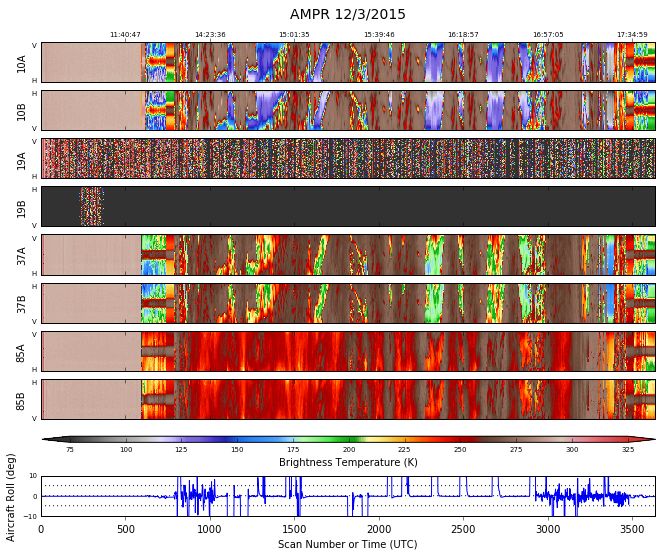

In [10]:
data = pyampr.AmprTb(files[7])
data.plot_ampr_channels()

##### As can be seen, we did not have 19 GHz channels during this flight. All other channels behaved well. The early part of the chart consists of engineering test data, which is why the functioning channels look so uniform at first. We are currently troubleshooting the 19 GHz issue, but with multiple planned successive flights we may not be able to diagnose the problem until a down or no-fly day.

##### For now, we will focus on the science. The ER-2, after gaining altitude, performed a coordinated underflight of the GPM core satellite during the overpass over the Olympics at 1522 UTC. After that, the aircraft flew orbits that overflew stratiform precipitation with embedded convection that was moving off the water and interacting with the mountains. First, let's look at the GPM overpass.


********************
plot_ampr_channels():
Available scans = 1 to 3634
Available times = 11:02:52 - 17:45:13
********************



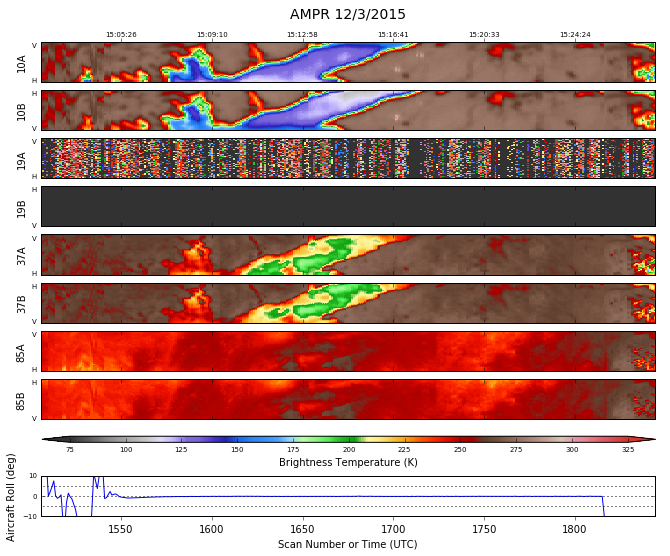

In [11]:
data.plot_ampr_channels(timerange=["15:02:00", "15:28:00"])

##### Kudos to the ER-2 pilot for straight and level flight during the overpass. Aircraft roll = 0 at and around 1522! Let's look at the geolocated data during this time.

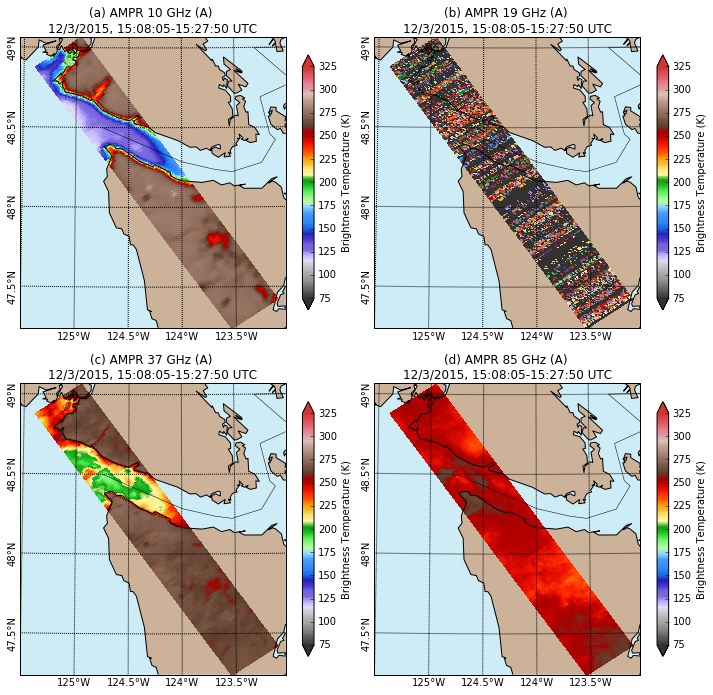

In [13]:
tst = '15:08:00'
ted = '15:28:00'
display = data.plot_ampr_track_4panel(
    chan='a', timerange=[tst, ted], maneuver=False, return_flag=True,
    meridians=0.5, parallels=0.5, resolution='i',
    show_grid=True, lonrange=[-125.5, -123])

##### The nature of the precipitation was similar in many respects to the previous flight. While 19 GHz was out of commission, the 10 GHz channels were largely insensitive to the stratiform precipitation over land. However, 37 GHz did sense emission over the Strait of Juan de Fuca. Meanwhile, the 85 GHz channels detected precipitation over the land as well as the water. There wasn't as big a rain shadow effect as last flight, so even the highest peaks are obscured by widespread precipitation at 85 GHz.

##### How was data quality during this part of the flight? We can take a quick look at the QC flags.

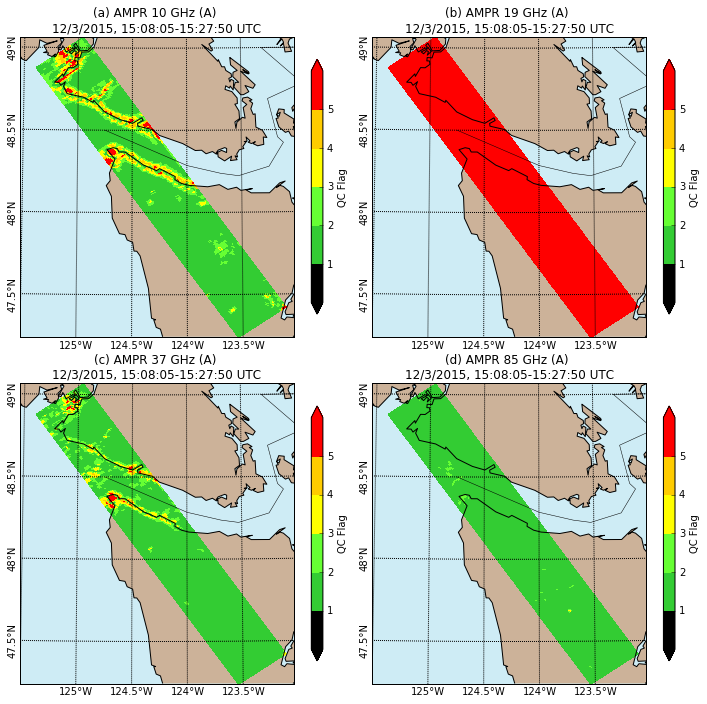

In [17]:
tst = '15:08:00'
ted = '15:28:00'
display = data.plot_ampr_track_4panel(
    chan='a', timerange=[tst, ted], maneuver=False, return_flag=True,
    meridians=0.5, parallels=0.5, resolution='i',
    show_grid=True, lonrange=[-125.5, -123], show_qc=True)

##### Basically, very good except for the missing 19 GHz and also where the scene transitions between ocean and land at the more coarsely resolved frequencies (e.g., 10 GHz). Now, let's look at the later portions of the flight, when the ER-2 flew SW-NE race tracks, similar to 12/01/2015. Let's look at a complete orbit.


********************
plot_ampr_channels():
Available scans = 1 to 3634
Available times = 11:02:52 - 17:45:13
********************



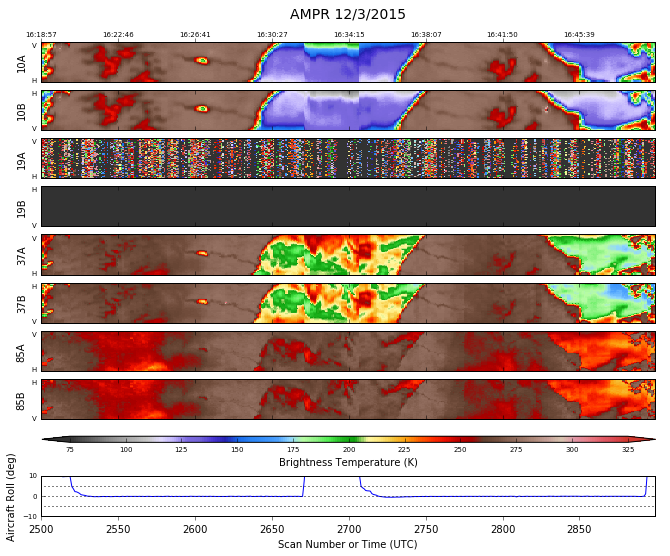

In [14]:
data.plot_ampr_channels(scanrange=[2500, 2900])

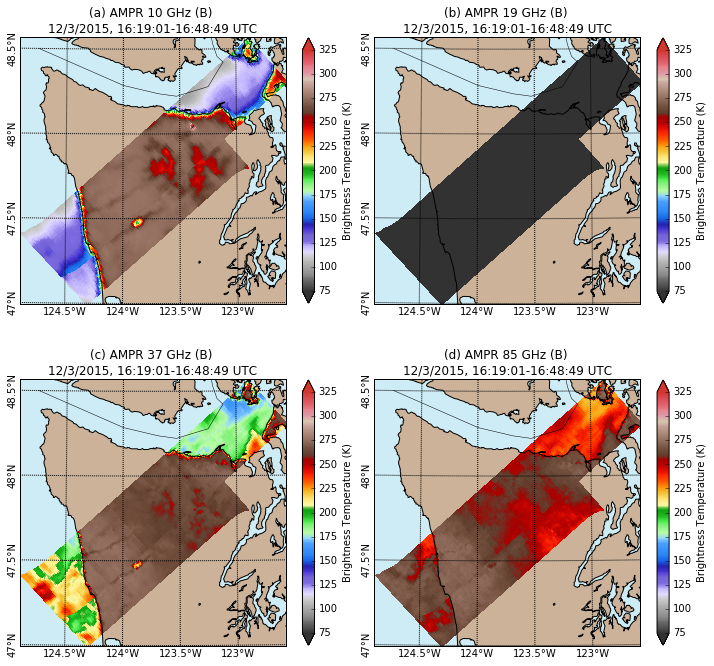

In [15]:
tst = '16:19:00'
ted = '16:49:00'
display = data.plot_ampr_track_4panel(
    chan='b', timerange=[tst, ted], maneuver=False, return_flag=True,
    meridians=0.5, parallels=0.5, resolution='h', area_thresh=1,
    show_grid=True)

##### Note the partial overlap between AMPR swaths, which is very common given the typical 10-12 nm offset on ER-2 racetracks. This particular orbit finished further to the NE, I believe to look at rain shadow effects in more detail. There was much less preciptation over the northern Puget Sound, where even 85 GHz started mapping the islands distinctively. Based on a comparison between the 12/1 flight and this one, it seems like 10 GHz was seeing somewhat larger snow fields over the Olympics during today's flight, which makes sense. In addition, 37 GHz seemed to detect some of the over-land precip, especially over the higher terrain. Land features are much less distinctive in that frequency, unlike 12/1, which is perhaps evidence of enhanced precip emission. 

<hr>
##### To sum up, this was another interesting dataset from AMPR. It is unfortunate that 19 GHz was unavailable, but the other 3 frequencies provided high-quality data both during and after the GPM overpass.